<a href="https://colab.research.google.com/github/gabisponciano/Modelos-de-Classificacao/blob/main/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bibliotecas Necessárias**#

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Pré-Processamento**#

##**Conjunto de Treino e Teste**##

In [ ]:
## Tirando os preditores
df_train = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/treino.csv')
limite_valores_ausentes = 0.5

proporcao_ausentes = df_train.isnull().mean()
colunas_a_remover = proporcao_ausentes[proporcao_ausentes > limite_valores_ausentes].index
df_train_sem_valores_ausentes = df_train.drop(columns=colunas_a_remover)
df_train_sem_valores_ausentes.to_csv(r'/tre_coluna.csv', index=False)
df_train_sem_valores_ausentes.to_csv(r'/content/drive/MyDrive/6 Semestre/HW3/tre_coluna.csv', index=False)


<ipython-input-4-f2c834211988>:2: DtypeWarning: Columns (90,105,119,120,123,124,132,134,135,138,139,147,149,150,153,154,162,164,165,168,169,177,179,183,184,192,194,198,199,207,209,213,214,224,237,239,244) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/treino.csv')


In [ ]:
df_train_sem_valores_ausentes.shape

(8708, 41)

In [ ]:
## Tirando linhas
df_train = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/tre_coluna.csv')
limite_valores_ausentes = 0.5
proporcao_ausentes_por_linha = df_train.isnull().mean(axis=1)
linhas_a_remover = proporcao_ausentes_por_linha[proporcao_ausentes_por_linha > limite_valores_ausentes].index
df_train_sem_linhas_ausentes = df_train.drop(index=linhas_a_remover)
df_train_sem_linhas_ausentes.to_csv('/content/drive/MyDrive/6 Semestre/HW3/tre_linha.csv', index=False)

In [ ]:
df_train_sem_linhas_ausentes.shape

(8126, 41)

In [ ]:
y = df_train_sem_linhas_ausentes['Grant.Status']
X = df_train_sem_linhas_ausentes.drop(columns=['Grant.Status'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)
X_test.to_csv('/content/drive/MyDrive/6 Semestre/HW3/X_test.csv', index=False)
X_train.to_csv('/content/drive/MyDrive/6 Semestre/HW3/X_train.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/6 Semestre/HW3/y_test.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/6 Semestre/HW3/y_train.csv', index=False)


In [ ]:
## Preencher os dados faltantes do treino e do teste. Fazemos separado para evitar data leakage.
X_train.fillna(X_train.mode().iloc[0], inplace=True)
X_test.fillna(X_test.mode().iloc[0], inplace=True)

df_train = X_train
df_test = X_test

In [ ]:
df_train.shape

(6500, 40)

In [ ]:
df_test.shape

(1626, 40)

In [ ]:
## Verificando se todos os datos estão preenchidos
print(sum(df_train.isna().sum()))
print(sum(df_test.isna().sum()))

0
0


In [ ]:
## Aplicamos LabelEncoder para converter colunas categóricas em numéricas
colunas_categoricas = df_train.select_dtypes(include=['object']).columns

for coluna in colunas_categoricas:
    encoder = LabelEncoder()
    df_train[coluna] = encoder.fit_transform(df_train[coluna].astype(str))
df_train.to_csv('/X_train_final.csv', index=False)
df_train.to_csv('/content/drive/MyDrive/6 Semestre/HW3/X_train_final.csv', index=False)

In [ ]:
df_train.shape

(6500, 40)

In [ ]:
## Aplicamos LabelEncoder para converter colunas categóricas em numéricas
colunas_categoricas = df_test.select_dtypes(include=['object']).columns

for coluna in colunas_categoricas:
    encoder = LabelEncoder()
    df_test[coluna] = encoder.fit_transform(df_test[coluna].astype(str))
df_test.to_csv('/X_test_final.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/6 Semestre/HW3/X_test_final.csv', index=False)

In [ ]:
df_test.shape

(1626, 40)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 7067 to 7833
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Grant.Application.ID                    6500 non-null   int64  
 1   Sponsor.Code                            6500 non-null   int64  
 2   Grant.Category.Code                     6500 non-null   int64  
 3   Contract.Value.Band...see.note.A        6500 non-null   int64  
 4   Start.date                              6500 non-null   int64  
 5   RFCD.Code.1                             6500 non-null   float64
 6   RFCD.Percentage.1                       6500 non-null   float64
 7   RFCD.Code.2                             6500 non-null   float64
 8   RFCD.Percentage.2                       6500 non-null   float64
 9   RFCD.Code.3                             6500 non-null   float64
 10  RFCD.Percentage.3                       6500 non-null   f

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 2259 to 6087
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Grant.Application.ID                    1626 non-null   int64  
 1   Sponsor.Code                            1626 non-null   int64  
 2   Grant.Category.Code                     1626 non-null   int64  
 3   Contract.Value.Band...see.note.A        1626 non-null   int64  
 4   Start.date                              1626 non-null   int64  
 5   RFCD.Code.1                             1626 non-null   float64
 6   RFCD.Percentage.1                       1626 non-null   float64
 7   RFCD.Code.2                             1626 non-null   float64
 8   RFCD.Percentage.2                       1626 non-null   float64
 9   RFCD.Code.3                             1626 non-null   float64
 10  RFCD.Percentage.3                       1626 non-null   f

#**Questão 1**#

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/X_train_final.csv')
X_test = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/X_test_final.csv')
y_train = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/y_test.csv')

## Parte do LDA
lda = LDA()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


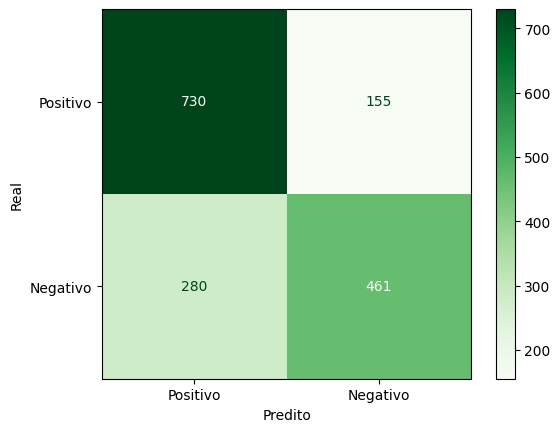

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, lda_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Positivo", "Negativo"])
cm_display.plot(cmap='Greens')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, lda_pred)
print(f'Acurácia: {accuracy:.2f}')
precision = precision_score(y_test, lda_pred)
print(f'Precisão: {precision:.2f}')

Acurácia: 0.73
Precisão: 0.75


In [ ]:
TN = confusion_matrix[1, 1]
TP = confusion_matrix[0, 0]
FN = confusion_matrix[0, 1]
FP = confusion_matrix[1, 0]

print(TP,TN,FP,FN)

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
npv = TN / (TN + FN)


print("Matriz de Confusão:")
print(confusion_matrix)
print("\nFração Geral de Previsões Corretas:", accuracy)
print("Sensibilidade:", sensitivity)
print("Especificidade:", specificity)
print("Precisão (PPV):", precision)
print("Valor Preditivo Negativo (NPV):", npv)

730 461 280 155
Matriz de Confusão:
[[730 155]
 [280 461]]

Fração Geral de Previsões Corretas: 0.7324723247232472
Sensibilidade: 0.8248587570621468
Especificidade: 0.6221322537112011
Precisão (PPV): 0.7227722772277227
Valor Preditivo Negativo (NPV): 0.7483766233766234


#**Questão 2**#

##**Análise Discriminante Quadrática**##

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


104 703 38 781
Matriz de Confusão:
[[104 781]
 [ 38 703]]

Fração Geral de Previsões Corretas: 0.496309963099631
Sensibilidade: 0.11751412429378531
Especificidade: 0.9487179487179487
Precisão (PPV): 0.7323943661971831
Valor Preditivo Negativo (NPV): 0.47371967654986524


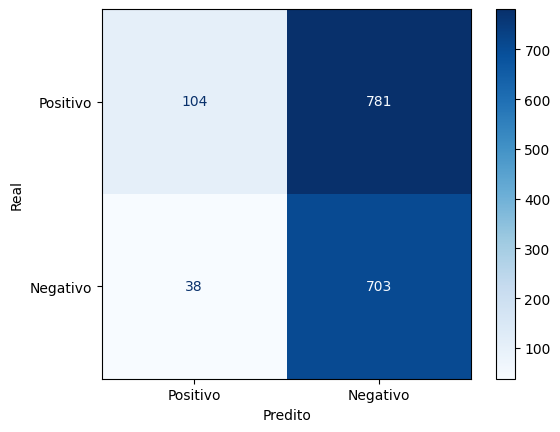

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/X_train_final.csv')
X_test = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/X_test_final.csv')
y_train = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/y_test.csv')

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
TN = confusion_matrix[1, 1]
TP = confusion_matrix[0, 0]
FN = confusion_matrix[0, 1]
FP = confusion_matrix[1, 0]

print(TP,TN,FP,FN)

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
npv = TN / (TN + FN)

print("Matriz de Confusão:")
print(confusion_matrix)
print("\nFração Geral de Previsões Corretas:", accuracy)
print("Sensibilidade:", sensitivity)
print("Especificidade:", specificity)
print("Precisão (PPV):", precision)
print("Valor Preditivo Negativo (NPV):", npv)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Positivo", "Negativo"])
cm_display.plot(cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

##**K-vizinhos mais próximos**##

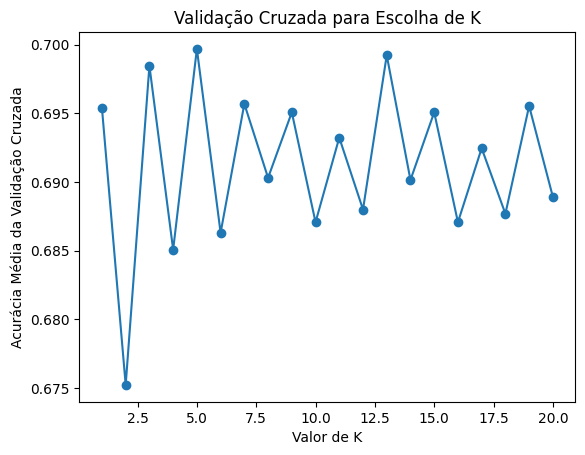

O melhor valor de k é: 5


In [ ]:
## Validação cruzada para descobrir o melhor K
X = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/X_train_final.csv')
y = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/y_train.csv')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y.values.ravel(), cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

best_k = k_values[np.argmax(cv_scores)]

plt.plot(k_values, cv_scores, marker='o')
plt.title('Validação Cruzada para Escolha de K')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia Média da Validação Cruzada')
plt.show()

print(f"O melhor valor de k é: {best_k}")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


660 431 310 225
Matriz de Confusão:
[[660 225]
 [310 431]]

Fração Geral de Previsões Corretas: 0.6709717097170972
Sensibilidade: 0.7457627118644068
Especificidade: 0.581646423751687
Precisão (PPV): 0.6804123711340206
Valor Preditivo Negativo (NPV): 0.6570121951219512


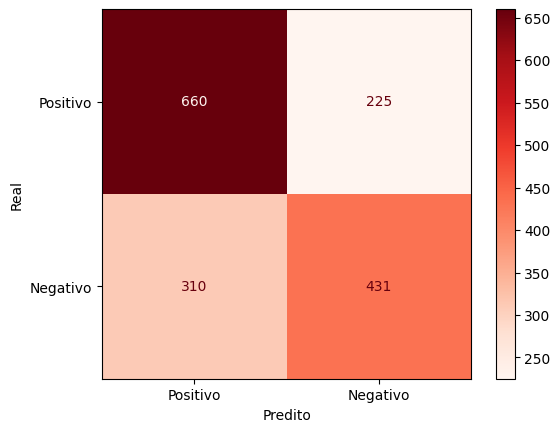

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/X_train_final.csv')
X_test = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/X_test_final.csv')
y_train = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/6 Semestre/HW3/y_test.csv')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
TN = confusion_matrix[1, 1]
TP = confusion_matrix[0, 0]
FN = confusion_matrix[0, 1]
FP = confusion_matrix[1, 0]

print(TP,TN,FP,FN)

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
npv = TN / (TN + FN)

print("Matriz de Confusão:")
print(confusion_matrix)
print("\nFração Geral de Previsões Corretas:", accuracy)
print("Sensibilidade:", sensitivity)
print("Especificidade:", specificity)
print("Precisão (PPV):", precision)
print("Valor Preditivo Negativo (NPV):", npv)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Positivo", "Negativo"])
cm_display.plot(cmap='Reds')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()




#**Curva ROC**#

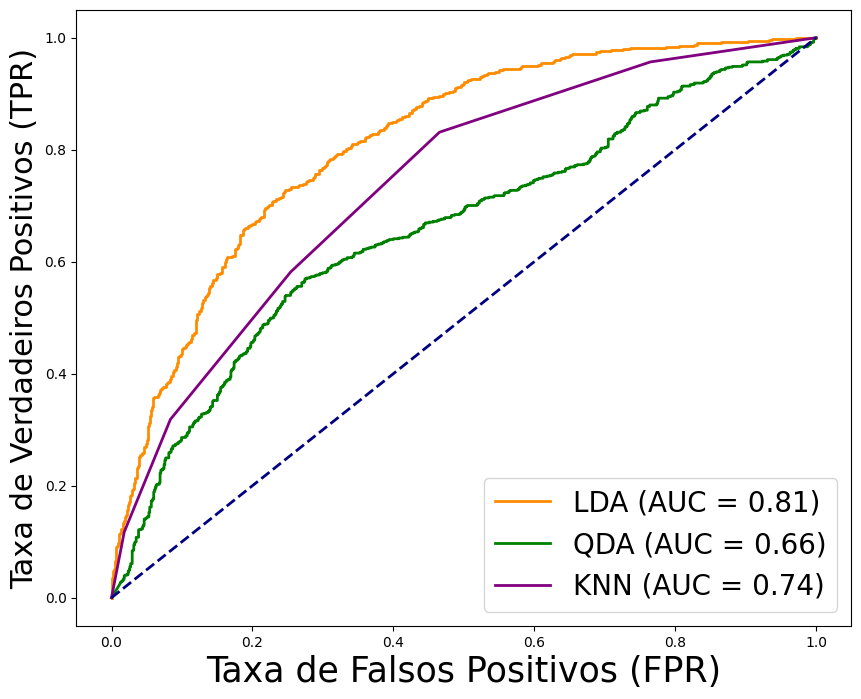

In [ ]:
plt.figure(figsize=(10, 8))

## Curva ROC para LDA
lda_probs = lda.predict_proba(X_test)[:, 1]
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, lda_probs)
fnr_lda = 1 - tpr_lda
plt.plot(fpr_lda, tpr_lda, color='darkorange', lw=2, label='LDA (AUC = %0.2f)' % auc(fpr_lda, tpr_lda))

## Curva ROC para QDA
qda_probs = qda.predict_proba(X_test)[:, 1]
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, qda_probs)
fnr_qda = 1 - tpr_qda
plt.plot(fpr_qda, tpr_qda, color='green', lw=2, label='QDA (AUC = %0.2f)' % auc(fpr_qda, tpr_qda))

## Curva ROC para KNN
y_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='purple', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc))


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=25)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=22)
plt.legend(loc="lower right", fontsize=20)
plt.show()
